Digite o numerador da funcao transferencia: 1 2
Digite o denominador da funcao transferencia: 1 3 6
Numerador:  ['1', '2']
Denominador:  ['1', '3', '6']
Polos :  [-1.5+1.93649167j -1.5-1.93649167j]
Zeros :  [-2.+0.j]


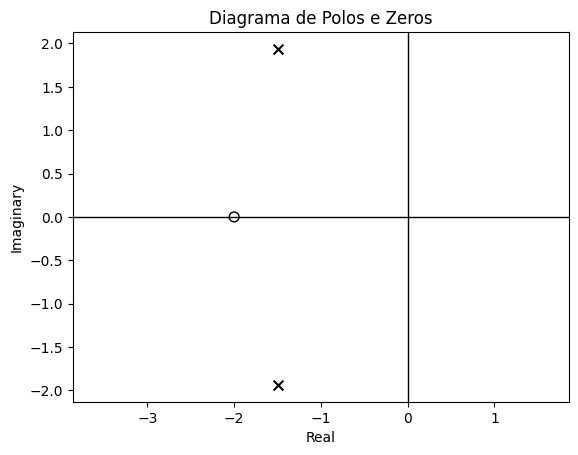

Quantos polos:  2
Quantos Zeros:  1


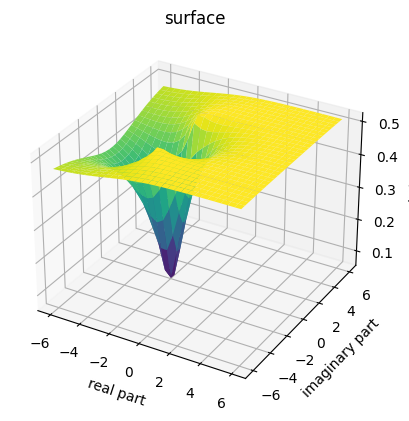

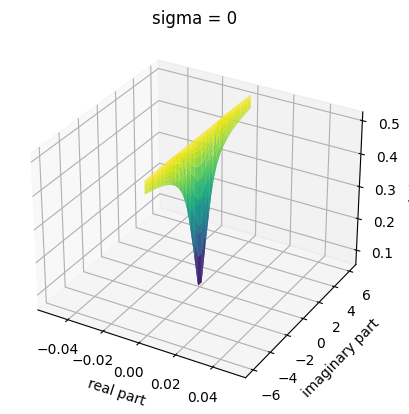

In [15]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

Num = input('Digite o numerador da funcao transferencia: ') #Entre com o numerador da ft, ex: (1 2 4) = (s^2 2s 4)
Den = input('Digite o denominador da funcao transferencia: ') #Entre com o denominador da ft, ex: (1 2) = (s^2 2s)

Ns = Num.split() #Retorna uma lista de string, quebra no espaço
Ds = Den.split() #Retorna uma lista de string, quebra no espaço

print('Numerador: ', Ns)  
print('Denominador: ', Ds)

Numvet = list(map(float,Ns)) #Converte para float
DenVet = list(map(float,Ds)) #Converte para float

Fs = ctl.TransferFunction(Numvet, DenVet) #
polos = ctl.poles(Fs) #calcula os polos da função
zeros = ctl.zeros(Fs) #calcula os polos da função

print('Polos : ',polos)  #Imprime os polos
print('Zeros : ',zeros)  #Imprime os zeros

Fs = ctl.pzmap(Fs,1,0,'Diagrama de Polos e Zeros')                 
plt.show()                                                          

qtdpole=len(polos)
qtdzero=len(zeros)

print('Quantos polos: ', qtdpole)
print('Quantos Zeros: ', qtdzero)

#Gráfico 3D

# Define a função z = f(x, y)
def f(x, y):

     Num = 0
     for i in range(qtdzero): #gera uma sequência de números: ex:
         Mnum = (X - zeros[i].real) ** 2 + (Y - zeros[i].imag) ** 2
         Num = Mnum**(1/2) + Num

     Den = 0
     for i in range(qtdpole):
         Mnum = (X - polos[i].real) ** 2 + (Y - polos[i].imag) ** 2
         Den = Mnum**(1/2) + Den

     return Num/Den

# Cria uma grade de pontos
x = np.linspace(-6, 6, 30) #gera trita valores entre -6 e 6
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)

# Calcula os valores de z para cada ponto na grade
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_title('surface')
ax.set_xlabel('real part')
ax.set_ylabel('imaginary part')
ax.set_zlabel('|H(s)|')

plt.show()

# GRÁFICO COM CORTE EM SIGMA = 0 (x = 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(0, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_title('sigma = 0')
ax.set_xlabel('real part')
ax.set_ylabel('imaginary part')
ax.set_zlabel('|H(s)|')

plt.show()